In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from operator import attrgetter
plt.style.use('ggplot')

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
df_supermarket = pd.read_csv("/content/gdrive/My Drive/MADT8101/week4/supermarket.csv")

In [4]:
df = df_supermarket.copy()

In [5]:
df.tail()

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,...,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION
578077,200738,20071116,6,12,1,0.01,PRD0903678,CL00222,DEP00076,G00023,...,UM,NaN,9.941080e+14,S,MM,Small Shop,Grocery,STORE00001,LS,E02
578078,200716,20070612,3,12,1,13.76,PRD0902312,CL00230,DEP00081,G00027,...,UM,OA,9.941060e+14,L,UM,Top Up,Fresh,STORE00001,LS,E02
578079,200637,20061109,5,16,1,4.47,PRD0900396,CL00229,DEP00081,G00027,...,UM,NaN,9.941030e+14,L,MM,Full Shop,Mixed,STORE00001,LS,E02
578080,200717,20070624,1,10,1,4.92,PRD0903065,CL00229,DEP00081,G00027,...,UM,YF,9.941060e+14,L,MM,Full Shop,Mixed,STORE00001,LS,E02
578081,200744,20071229,7,14,1,9.27,PRD0901923,CL00229,DEP00081,G00027,...,UM,NaN,9.941090e+14,L,MM,Top Up,Mixed,STORE00001,LS,E02


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578082 entries, 0 to 578081
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SHOP_WEEK                 578082 non-null  int64  
 1   SHOP_DATE                 578082 non-null  int64  
 2   SHOP_WEEKDAY              578082 non-null  int64  
 3   SHOP_HOUR                 578082 non-null  int64  
 4   QUANTITY                  578082 non-null  int64  
 5   SPEND                     578082 non-null  float64
 6   PROD_CODE                 578082 non-null  object 
 7   PROD_CODE_10              578082 non-null  object 
 8   PROD_CODE_20              578082 non-null  object 
 9   PROD_CODE_30              578082 non-null  object 
 10  PROD_CODE_40              578082 non-null  object 
 11  CUST_CODE                 492494 non-null  object 
 12  CUST_PRICE_SENSITIVITY    492494 non-null  object 
 13  CUST_LIFESTAGE            433142 non-null  o

In [7]:
df.isna().sum()

SHOP_WEEK                        0
SHOP_DATE                        0
SHOP_WEEKDAY                     0
SHOP_HOUR                        0
QUANTITY                         0
SPEND                            0
PROD_CODE                        0
PROD_CODE_10                     0
PROD_CODE_20                     0
PROD_CODE_30                     0
PROD_CODE_40                     0
CUST_CODE                    85588
CUST_PRICE_SENSITIVITY       85588
CUST_LIFESTAGE              144940
BASKET_ID                        0
BASKET_SIZE                      0
BASKET_PRICE_SENSITIVITY         0
BASKET_TYPE                      0
BASKET_DOMINANT_MISSION          0
STORE_CODE                       0
STORE_FORMAT                     0
STORE_REGION                     0
dtype: int64

In [8]:
# Drop customer that CUST_CODE = NaN
df.dropna(subset=['CUST_CODE'], inplace=True)

# fill NaN in CUST_LIFESTAGE
df['CUST_LIFESTAGE'] = df['CUST_LIFESTAGE'].fillna('XX')

In [9]:
df.isna().sum()

SHOP_WEEK                   0
SHOP_DATE                   0
SHOP_WEEKDAY                0
SHOP_HOUR                   0
QUANTITY                    0
SPEND                       0
PROD_CODE                   0
PROD_CODE_10                0
PROD_CODE_20                0
PROD_CODE_30                0
PROD_CODE_40                0
CUST_CODE                   0
CUST_PRICE_SENSITIVITY      0
CUST_LIFESTAGE              0
BASKET_ID                   0
BASKET_SIZE                 0
BASKET_PRICE_SENSITIVITY    0
BASKET_TYPE                 0
BASKET_DOMINANT_MISSION     0
STORE_CODE                  0
STORE_FORMAT                0
STORE_REGION                0
dtype: int64

In [10]:
#change SHOP_DATE format to %Y%m%d
df['SHOP_DATE'] = pd.to_datetime(df['SHOP_DATE'], format='%Y%m%d')
df['SHOP_MONTH'] = df['SHOP_DATE'].dt.to_period('m')
df.sort_values(by='SHOP_MONTH')

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,...,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION,SHOP_MONTH
187988,200608,2006-04-18,3,13,3,0.69,PRD0903332,CL00104,DEP00036,G00010,...,OT,9.941000e+14,L,LA,Top Up,Mixed,STORE00001,LS,E02,2006-04
466865,200608,2006-04-22,7,19,3,2.31,PRD0904035,CL00065,DEP00019,G00007,...,YA,9.941000e+14,L,MM,Top Up,Fresh,STORE00001,LS,E02,2006-04
175275,200608,2006-04-17,2,10,4,1.60,PRD0904925,CL00070,DEP00020,G00007,...,OT,9.941000e+14,L,MM,Full Shop,Fresh,STORE00001,LS,E02,2006-04
224594,200609,2006-04-28,6,19,1,0.90,PRD0902271,CL00044,DEP00011,G00004,...,OF,9.941000e+14,M,LA,Small Shop,Mixed,STORE00001,LS,E02,2006-04
91111,200608,2006-04-19,4,16,1,1.39,PRD0901712,CL00078,DEP00022,G00007,...,YF,9.941000e+14,L,MM,Full Shop,Fresh,STORE00001,LS,E02,2006-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342512,200819,2008-07-02,4,18,3,1.38,PRD0903322,CL00203,DEP00068,G00022,...,OF,9.941120e+14,M,LA,Small Shop,Nonfood,STORE00001,LS,E02,2008-07
133369,200819,2008-07-05,7,9,3,2.19,PRD0903685,CL00152,DEP00052,G00015,...,YF,9.941120e+14,M,LA,Small Shop,Grocery,STORE00001,LS,E02,2008-07
557030,200819,2008-07-02,4,11,4,8.04,PRD0904538,CL00098,DEP00031,G00008,...,OT,9.941120e+14,L,LA,Full Shop,Mixed,STORE00001,LS,E02,2008-07
291641,200819,2008-07-05,7,14,1,3.27,PRD0904615,CL00126,DEP00046,G00013,...,OF,9.941120e+14,L,LA,Top Up,Mixed,STORE00001,LS,E02,2008-07


Customer Movement Analysis

In [11]:
df_churn = df.copy()
df_churn = df_churn[['CUST_CODE', 'SHOP_MONTH']].drop_duplicates().sort_values(by='SHOP_MONTH').reset_index(drop=True)
df_churn['start_month'] = df_churn.groupby('CUST_CODE')['SHOP_MONTH'].transform('min')
df_churn['period_number'] = (df_churn['SHOP_MONTH'] - df_churn['start_month']).apply(attrgetter('n')).astype(int)

df_churn.tail(5)

,CUST_CODE,SHOP_MONTH,start_month,period_number
22486,CUST0000242095,2008-07,2006-04,27
22487,CUST0000909859,2008-07,2006-08,23
22488,CUST0000290153,2008-07,2006-07,24
22489,CUST0000335064,2008-07,2006-04,27
22490,CUST0000871730,2008-07,2006-04,27


In [12]:
# set status labels
df_churn['labels'] = df_churn.apply(lambda row: 'new' if row['SHOP_MONTH'] == row['start_month'] else '', axis=1)
maxmonth = df_churn['SHOP_MONTH'].max()
new_rows = []
for cust_code in df_churn['CUST_CODE'].unique() :
    period = df_churn.loc[df_churn['CUST_CODE'] == cust_code, :]['period_number']
    n = 0

    for p in period:
        if n+1==p :
            df_churn.loc[(df_churn['CUST_CODE'] == cust_code) & (df_churn['period_number'] == p), ['labels']] = df_churn.loc[(df_churn['CUST_CODE'] == cust_code) & (df_churn['period_number'] == p), ['labels']].replace('','repeat')
            n+=1

        elif n+1 < p :
            last_order = df_churn.loc[(df_churn['CUST_CODE'] == cust_code) & (df_churn['period_number'] == n)]
            new_row = {'CUST_CODE': cust_code, 'labels': 'churn', 'period_number': n + 1, 'SHOP_MONTH': last_order['SHOP_MONTH'].values[0]+1}
            new_rows.append(new_row)

            df_churn.loc[(df_churn['CUST_CODE'] == cust_code) & (df_churn['period_number'] == p), ['labels']] = df_churn.loc[(df_churn['CUST_CODE'] == cust_code) & (df_churn['period_number'] == p), ['labels']].replace('','reactivated')
            n=p

    user_maxmonth = df_churn[df_churn['CUST_CODE'] == cust_code]['SHOP_MONTH'].max()
    if user_maxmonth != maxmonth:

        new_row = {'CUST_CODE': cust_code, 'labels': 'churn', 'period_number':p+1, 'SHOP_MONTH':user_maxmonth+1}
        new_rows.append(new_row)


new_data = pd.DataFrame(new_rows)
df_churn = pd.concat([new_data, df_churn])
df_churn.reset_index(drop=True, inplace=True)
df_churn.tail(5)

,CUST_CODE,labels,period_number,SHOP_MONTH,start_month
30969,CUST0000242095,repeat,27,2008-07,2006-04
30970,CUST0000909859,repeat,23,2008-07,2006-08
30971,CUST0000290153,reactivated,24,2008-07,2006-07
30972,CUST0000335064,repeat,27,2008-07,2006-04
30973,CUST0000871730,repeat,27,2008-07,2006-04


In [13]:
df_churn_plot = pd.pivot_table(data=df_churn, values='CUST_CODE', index='SHOP_MONTH', columns='labels', aggfunc='count', fill_value=0).reset_index()
df_churn_plot['churn'] = -df_churn_plot['churn']
df_churn_plot['SHOP_MONTH'] = df_churn_plot['SHOP_MONTH'].astype('str')
df_churn_plot

labels,SHOP_MONTH,churn,new,reactivated,repeat
0,2006-04,0,530,0,0
1,2006-05,-184,304,0,346
2,2006-06,-247,196,50,403
3,2006-07,-206,226,107,443
4,2006-08,-285,221,122,491
5,2006-09,-302,214,147,532
6,2006-10,-347,149,152,546
7,2006-11,-308,130,158,539
8,2006-12,-266,142,206,561
9,2007-01,-361,87,190,548


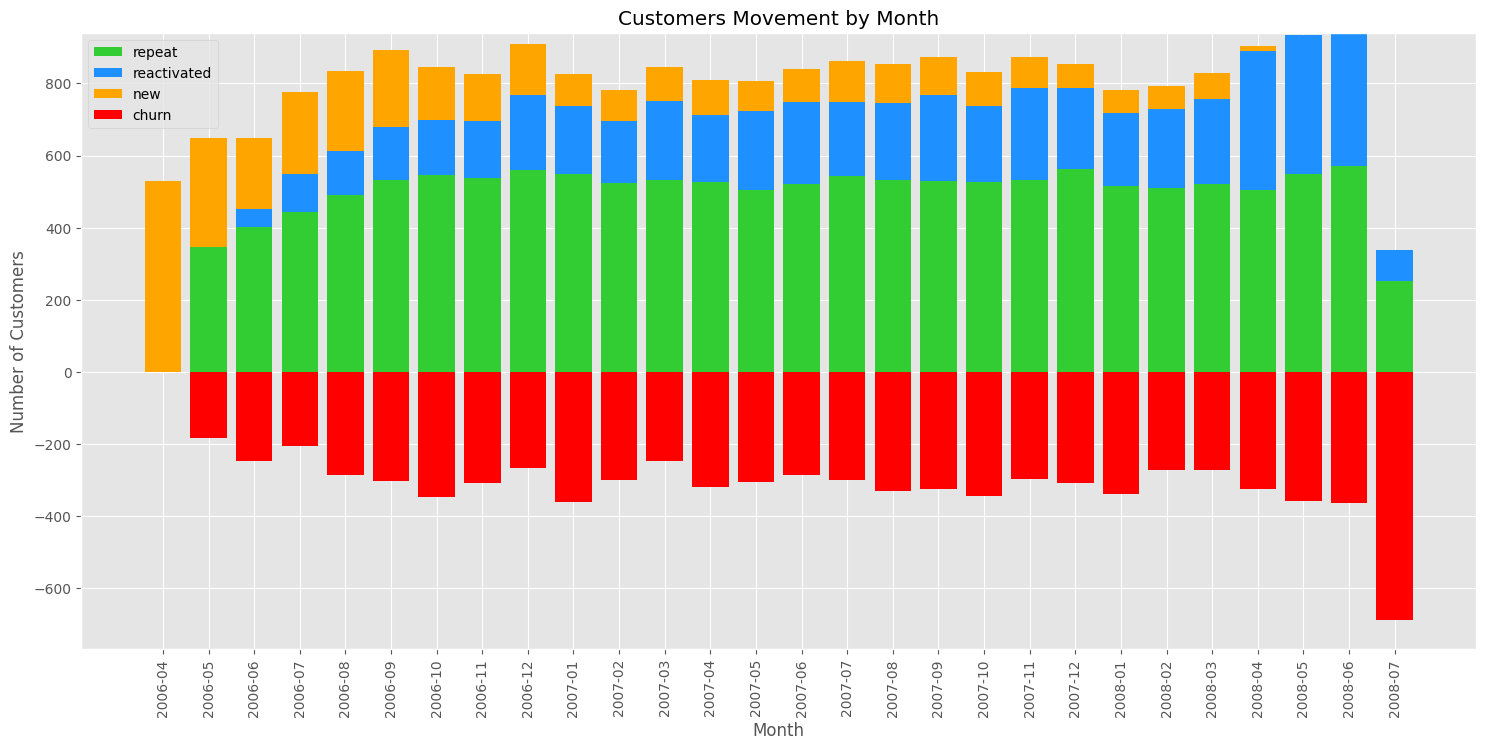

In [14]:
plt.figure(figsize=(18,8))
ax = plt.gca()
bottoms = 0

labels = ['repeat', 'reactivated', 'new']
c = ['limegreen', 'dodgerblue', 'orange']
for i in range(len(labels)):
  plt.bar( x = df_churn_plot['SHOP_MONTH'],
           height=df_churn_plot[labels[i]],
           color = c[i],
           bottom=bottoms,
           label=labels[i])

  bottoms += df_churn_plot[labels[i]].fillna(0)

ax.bar(height=df_churn_plot['churn'],
       x=df_churn_plot['SHOP_MONTH'],
       color='red',
       bottom=0,
       label='churn')

plt.xticks(rotation='vertical')

plt.legend(loc='upper left')
plt.xlabel('Month')
plt.ylabel('Number of Customers')
plt.title('Customers Movement by Month')

plt.show()

Cohort Analysis (Retention)

In [15]:
df_cohort = df.copy()

In [16]:
df_cohort = df_cohort[['CUST_CODE', 'BASKET_ID','SHOP_MONTH']].drop_duplicates()
df_cohort['CohortMonth'] = df_cohort.groupby('CUST_CODE')['SHOP_MONTH'].transform('min')
df_cohort['CohortIndex'] = (df_cohort['SHOP_MONTH'] - df_cohort['CohortMonth']).apply(attrgetter('n')).astype(int)
df_cohort.reset_index(drop= True)

,CUST_CODE,BASKET_ID,SHOP_MONTH,CohortMonth,CohortIndex
0,CUST0000804514,9.941080e+14,2007-10,2007-10,0
1,CUST0000735558,9.941100e+14,2008-03,2008-03,0
2,CUST0000138092,9.941110e+14,2008-06,2006-04,26
3,CUST0000099658,9.941040e+14,2006-12,2006-04,8
4,CUST0000673735,9.941070e+14,2007-07,2006-04,15
...,...,...,...,...,...
25657,CUST0000659438,9.941100e+14,2008-02,2006-12,14
25658,CUST0000411101,9.941070e+14,2007-09,2007-05,4
25659,CUST0000132530,9.941040e+14,2006-12,2006-08,4
25660,CUST0000392892,9.941110e+14,2008-04,2006-05,23


In [17]:
cohort_data = df_cohort.groupby(['CohortMonth', 'CohortIndex'])['CUST_CODE'].apply(pd.Series.nunique).reset_index()
cohort_count = cohort_data.pivot_table(index = 'CohortMonth',
                                       columns = 'CohortIndex',
                                       values = 'CUST_CODE')
cohort_count

CohortIndex,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
CohortMonth,,,,,,,,,,,,,,,,,,,,,
2006-04,530.0,346.0,355.0,370.0,358.0,363.0,354.0,338.0,354.0,337.0,...,301.0,296.0,301.0,291.0,288.0,292.0,343.0,367.0,358.0,182.0
2006-05,304.0,98.0,116.0,113.0,125.0,117.0,111.0,113.0,116.0,101.0,...,95.0,97.0,92.0,85.0,93.0,104.0,123.0,117.0,46.0,NaN
2006-06,196.0,64.0,72.0,71.0,52.0,61.0,72.0,53.0,46.0,59.0,...,61.0,41.0,46.0,44.0,58.0,63.0,64.0,22.0,NaN,NaN
2006-07,226.0,70.0,69.0,69.0,61.0,52.0,56.0,53.0,48.0,55.0,...,46.0,44.0,54.0,59.0,57.0,64.0,23.0,NaN,NaN,NaN
2006-08,221.0,51.0,50.0,41.0,55.0,40.0,45.0,51.0,45.0,36.0,...,27.0,27.0,47.0,43.0,53.0,13.0,NaN,NaN,NaN,NaN
2006-09,214.0,56.0,50.0,52.0,42.0,34.0,44.0,33.0,37.0,39.0,...,32.0,49.0,51.0,49.0,10.0,NaN,NaN,NaN,NaN,NaN
2006-10,149.0,35.0,42.0,39.0,25.0,31.0,23.0,26.0,22.0,22.0,...,32.0,36.0,37.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
2006-11,130.0,27.0,28.0,26.0,31.0,23.0,24.0,25.0,24.0,29.0,...,23.0,35.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12,142.0,27.0,15.0,25.0,21.0,23.0,20.0,23.0,17.0,13.0,...,32.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
cohort_size = cohort_count.iloc[:,0]
retention = cohort_count.divide(cohort_size, axis = 0)
retention.round(3) * 100

CohortIndex,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
CohortMonth,,,,,,,,,,,,,,,,,,,,,
2006-04,100.0,65.3,67.0,69.8,67.5,68.5,66.8,63.8,66.8,63.6,...,56.8,55.8,56.8,54.9,54.3,55.1,64.7,69.2,67.5,34.3
2006-05,100.0,32.2,38.2,37.2,41.1,38.5,36.5,37.2,38.2,33.2,...,31.2,31.9,30.3,28.0,30.6,34.2,40.5,38.5,15.1,NaN
2006-06,100.0,32.7,36.7,36.2,26.5,31.1,36.7,27.0,23.5,30.1,...,31.1,20.9,23.5,22.4,29.6,32.1,32.7,11.2,NaN,NaN
2006-07,100.0,31.0,30.5,30.5,27.0,23.0,24.8,23.5,21.2,24.3,...,20.4,19.5,23.9,26.1,25.2,28.3,10.2,NaN,NaN,NaN
2006-08,100.0,23.1,22.6,18.6,24.9,18.1,20.4,23.1,20.4,16.3,...,12.2,12.2,21.3,19.5,24.0,5.9,NaN,NaN,NaN,NaN
2006-09,100.0,26.2,23.4,24.3,19.6,15.9,20.6,15.4,17.3,18.2,...,15.0,22.9,23.8,22.9,4.7,NaN,NaN,NaN,NaN,NaN
2006-10,100.0,23.5,28.2,26.2,16.8,20.8,15.4,17.4,14.8,14.8,...,21.5,24.2,24.8,4.7,NaN,NaN,NaN,NaN,NaN,NaN
2006-11,100.0,20.8,21.5,20.0,23.8,17.7,18.5,19.2,18.5,22.3,...,17.7,26.9,6.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12,100.0,19.0,10.6,17.6,14.8,16.2,14.1,16.2,12.0,9.2,...,22.5,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


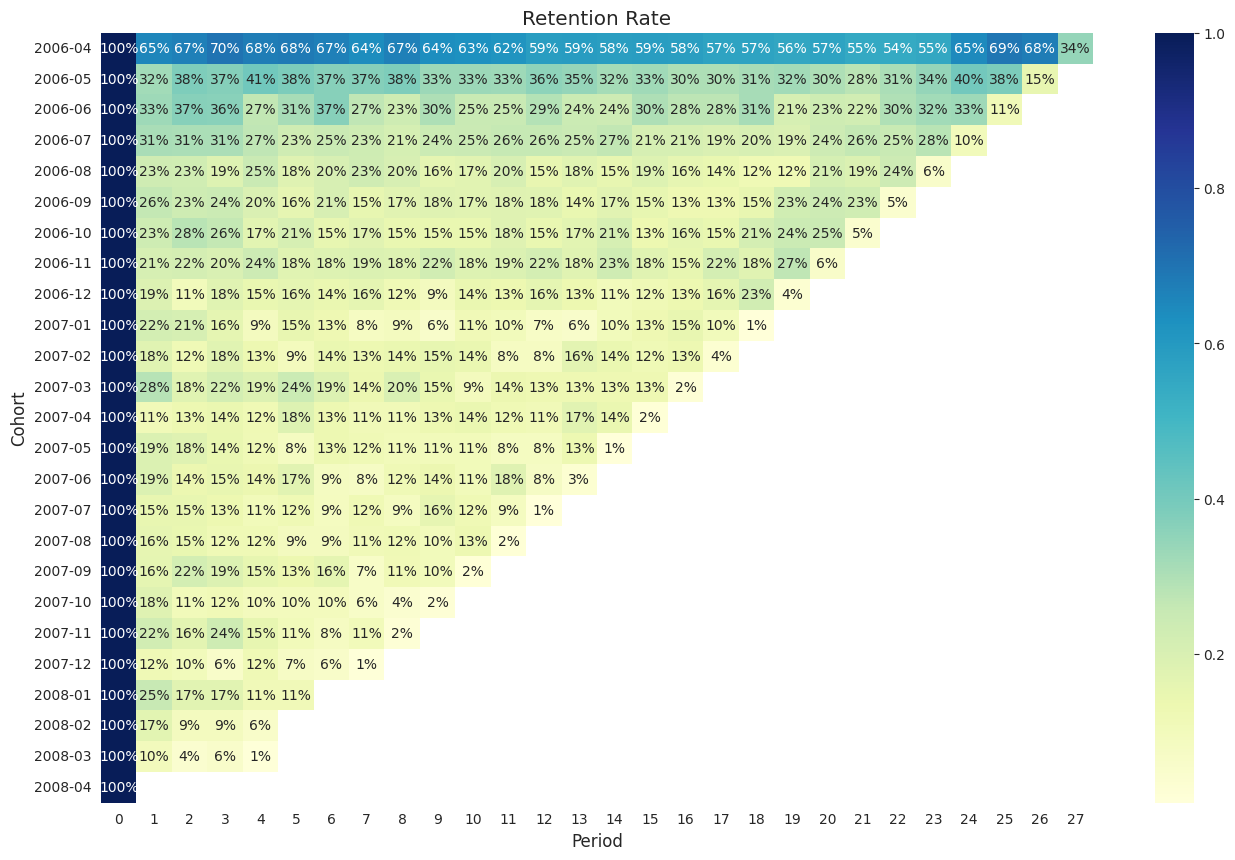

In [19]:
with sns.axes_style("white"):
    # Create a heatmap
    plt.figure(figsize=(16, 10))
    sns.heatmap(retention, annot=True, fmt=".0%", cmap="YlGnBu")
    plt.title("Retention Rate")
    plt.xlabel("Period")
    plt.ylabel("Cohort")

    plt.show()